# Student Data Challenge Jan 2018

In [1]:
# packages
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from itertools import product
from collections import OrderedDict ### data structure.. for laziness
import seaborn as sns
import operator
%matplotlib inline

In [2]:
df = pd.read_csv('X_train.csv')
df.head()

,Doctor Identifier,Provider Type,Number of Services,Number of Beneficiaries,Total Submitted Charge Amount,Total Allowed Amount,Total Payment Amount,Total Standardized Payment Amount,Number of Drug Services,Total Drug Submitted Charge Amount,...,Percent Depression,Percent Diabetes,Percent Hyperlipidemia,Percent Hypertension,Percent Ischemic Heart Disease,Percent Osteoporosis,Percent Rheumatoid Arthritis or Osteoarthritis,Percent Schizophrenia or Other Psychotic Disorders,Percent Stroke,Average HCC Risk Score of Beneficiaries
0,450181093,Optometry,491,66,52550.00,45827.70,34211.71,32460.86,0,0.00,...,75.0,18.00,41.0,50.0,3.11,0.83,23.0,18.00,0.65,1.28
1,375128823,Emergency Medicine,3883,211,165408.00,84216.16,62257.97,62267.51,3304,28918.00,...,42.0,24.00,48.0,56.0,22.00,9.00,38.0,7.00,10.00,1.52
2,429379427,CRNA,3103,632,531584.25,230479.28,174262.00,167305.78,1016,32044.25,...,24.0,19.00,44.0,57.0,25.00,12.00,67.0,4.00,7.00,1.11
3,993555030,Podiatry,43,42,2935.00,2932.84,1652.31,4208.75,0,0.00,...,31.0,0.89,62.0,57.0,36.00,0.27,38.0,0.44,0.25,1.00
4,786413532,Licensed Clinical Social Worker,151,34,13118.00,3991.45,3911.61,3402.45,0,0.00,...,56.0,75.00,75.0,75.0,41.00,0.05,56.0,0.00,0.03,1.57


### Sort out the data!

In [3]:
df.dtypes

Doctor Identifier                                        int64
Provider Type                                           object
Number of Services                                       int64
Number of Beneficiaries                                  int64
Total Submitted Charge Amount                          float64
Total Allowed Amount                                   float64
Total Payment Amount                                   float64
Total Standardized Payment Amount                      float64
Number of Drug Services                                  int64
Total Drug Submitted Charge Amount                     float64
Total Drug Allowed Amount                              float64
Total Drug Payment Amount                              float64
Total Drug Standardized Payment Amount                 float64
Number of Medical Services                               int64
Percent Atrial Fibrillation                            float64
Percent Alzheimer’s Disease or Dementia                

In [4]:
df.columns

Index(['Doctor Identifier', 'Provider Type', 'Number of Services',
       'Number of Beneficiaries', 'Total Submitted Charge Amount',
       'Total Allowed Amount', 'Total Payment Amount',
       'Total Standardized Payment Amount', 'Number of Drug Services',
       'Total Drug Submitted Charge Amount', 'Total Drug Allowed Amount ',
       'Total Drug Payment Amount ', 'Total Drug Standardized Payment Amount',
       'Number of Medical Services', 'Percent Atrial Fibrillation',
       'Percent Alzheimer’s Disease or Dementia ', 'Percent Asthma ',
       'Percent Cancer ', 'Percent Heart Failure ',
       'Percent Chronic Kidney Disease',
       'Percent Chronic Obstructive Pulmonary Disease', 'Percent Depression ',
       'Percent Diabetes ', 'Percent Hyperlipidemia ', 'Percent Hypertension ',
       'Percent Ischemic Heart Disease ', 'Percent Osteoporosis ',
       'Percent Rheumatoid Arthritis or Osteoarthritis ',
       'Percent Schizophrenia or Other Psychotic Disorders ',
       'P

In [140]:
inds_NaN = df['Number of Drug Services'] == 0
# df['Number of Drug Services'][inds_NaN] = -1

In [6]:
# one hot encode the provider type
# np.unique(df['Provider Type'].values).size
# 30 + 84

df_ohe = pd.get_dummies(df, 'Provider Type')
df_ohe.head()

,Doctor Identifier,Number of Services,Number of Beneficiaries,Total Submitted Charge Amount,Total Allowed Amount,Total Payment Amount,Total Standardized Payment Amount,Number of Drug Services,Total Drug Submitted Charge Amount,Total Drug Allowed Amount,...,Provider Type_Registered Dietician/Nutrition Professional,Provider Type_Rheumatology,Provider Type_Sleep Medicine,Provider Type_Speech Language Pathologist,Provider Type_Sports Medicine,Provider Type_Surgical Oncology,Provider Type_Thoracic Surgery,Provider Type_Unknown Physician Specialty Code,Provider Type_Urology,Provider Type_Vascular Surgery
0,450181093,491,66,52550.00,45827.70,34211.71,32460.86,-1,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
1,375128823,3883,211,165408.00,84216.16,62257.97,62267.51,3304,28918.00,18847.34,...,0,0,0,0,0,0,0,0,0,0
2,429379427,3103,632,531584.25,230479.28,174262.00,167305.78,1016,32044.25,22049.04,...,0,0,0,0,0,0,0,0,0,0
3,993555030,43,42,2935.00,2932.84,1652.31,4208.75,-1,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
4,786413532,151,34,13118.00,3991.45,3911.61,3402.45,-1,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0


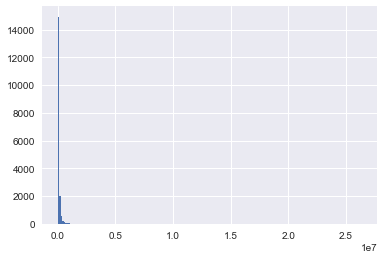

In [7]:
plt.hist(df_ohe['Total Allowed Amount'], bins = 200);

In [8]:
df_ohe.shape

(18000, 114)

In [10]:
df.dtypes

Doctor Identifier                                        int64
Provider Type                                           object
Number of Services                                       int64
Number of Beneficiaries                                  int64
Total Submitted Charge Amount                          float64
Total Allowed Amount                                   float64
Total Payment Amount                                   float64
Total Standardized Payment Amount                      float64
Number of Drug Services                                  int64
Total Drug Submitted Charge Amount                     float64
Total Drug Allowed Amount                              float64
Total Drug Payment Amount                              float64
Total Drug Standardized Payment Amount                 float64
Number of Medical Services                               int64
Percent Atrial Fibrillation                            float64
Percent Alzheimer’s Disease or Dementia                

In [11]:
# add some new features (average per number of services)

# per Service
df_ohe['Submitted Charge per Service'] = pd.Series(df['Total Submitted Charge Amount'].values/ df['Number of Services'].values)
df_ohe['Allowed Amount per Service'] = pd.Series(df['Total Allowed Amount'].values/df['Number of Services'])
df_ohe['Payment Amount per Service'] = pd.Series(df['Total Payment Amount'].values/df['Number of Services'])
df_ohe['Drug Submitted Charge Amount per Service'] = pd.Series(df['Total Submitted Charge Amount']/df['Number of Services'])
df_ohe['Drug Allowed Amount per Service'] = pd.Series(df['Total Drug Allowed Amount ']/df['Number of Services'])
df_ohe['Drug Payment Amount per Service'] = pd.Series(df['Total Drug Payment Amount ']/df['Number of Services'])


# per beneficianry

df_ohe['Submitted Charge per Beneficiary'] = pd.Series(df['Total Submitted Charge Amount'].values/ df['Number of Beneficiaries'].values)
df_ohe['Allowed Amount per Beneficiary'] = pd.Series(df['Total Allowed Amount'].values/df['Number of Beneficiaries'])
df_ohe['Payment Amount per Beneficiary'] = pd.Series(df['Total Payment Amount'].values/df['Number of Beneficiaries'])
df_ohe['Drug Submitted Charge Amount per Beneficiary'] = pd.Series(df['Total Submitted Charge Amount']/df['Number of Beneficiaries'])
df_ohe['Drug Allowed Amount per Beneficiary'] = pd.Series(df['Total Drug Allowed Amount ']/df['Number of Beneficiaries'])
df_ohe['Drug Payment Amount per Beneficiary'] = pd.Series(df['Total Drug Payment Amount ']/df['Number of Beneficiaries'])

# per Drug
df_ohe['Submitted Charge per Drug'] = pd.Series(df['Total Submitted Charge Amount'].values/ df['Number of Drug Services'].values)
df_ohe['Allowed Amount per Drug'] = pd.Series(df['Total Allowed Amount'].values/df['Number of Drug Services'])
df_ohe['Payment Amount per Drug'] = pd.Series(df['Total Payment Amount'].values/df['Number of Drug Services'])
df_ohe['Drug Submitted Charge Amount per Drug'] = pd.Series(df['Total Submitted Charge Amount']/df['Number of Drug Services'])
df_ohe['Drug Allowed Amount per Drug'] = pd.Series(df['Total Drug Allowed Amount ']/df['Number of Drug Services'])
df_ohe['Drug Payment Amount per Drug'] = pd.Series(df['Total Drug Payment Amount ']/df['Number of Drug Services'])

# 6*3 = 18 new features

In [12]:
df_ohe.shape

(18000, 132)

In [13]:
df_ohe.columns[113]

'Provider Type_Vascular Surgery'

In [14]:
for ind, col in enumerate(df_ohe.columns):
    print(ind, col)

0 Doctor Identifier
1 Number of Services
2 Number of Beneficiaries
3 Total Submitted Charge Amount
4 Total Allowed Amount
5 Total Payment Amount
6 Total Standardized Payment Amount
7 Number of Drug Services
8 Total Drug Submitted Charge Amount
9 Total Drug Allowed Amount 
10 Total Drug Payment Amount 
11 Total Drug Standardized Payment Amount
12 Number of Medical Services
13 Percent Atrial Fibrillation
14 Percent Alzheimer’s Disease or Dementia 
15 Percent Asthma 
16 Percent Cancer 
17 Percent Heart Failure 
18 Percent Chronic Kidney Disease
19 Percent Chronic Obstructive Pulmonary Disease
20 Percent Depression 
21 Percent Diabetes 
22 Percent Hyperlipidemia 
23 Percent Hypertension 
24 Percent Ischemic Heart Disease 
25 Percent Osteoporosis 
26 Percent Rheumatoid Arthritis or Osteoarthritis 
27 Percent Schizophrenia or Other Psychotic Disorders 
28 Percent Stroke 
29 Average HCC Risk Score of Beneficiaries 
30 Provider Type_Addiction Medicine
31 Provider Type_All Other Suppliers
32 Pr

In [15]:
# remove NaN

whereareNaNs = np.isnan(df_ohe.values)
print(sum(whereareNaNs))

df_ohe.iloc[:, -7:][inds_NaN] = 0;

whereareNaNs = np.isnan(df_ohe.values)
print(sum(whereareNaNs))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [367]:
#  Standardize 
def standardize(x, x_ref):
    mean = np.mean(x_ref);
    std = np.std(x_ref);

    x_stand = (x - mean)/std;
    return x_stand

df_num_1 = df_ohe.iloc[:, 1:30].copy();
df_num_1_unstand = df_num_1.copy()
df_num_1_stand = standardize(df_num_1, df_num_1_unstand)

df_num_2 = df_ohe.iloc[:, 114:].copy();
df_num_2_unstand = df_num_2.copy()
df_num_2_stand = standardize(df_num_2, df_num_2_unstand)

df_num_2_stand.iloc[:, -6:][inds_NaN] =-1;

df_stand = pd.concat([df.iloc[:, 0], df_num_1_stand, df_num_2_stand, df_ohe.iloc[:, 30:114]], axis =1)

/Users/kate_zym/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/kate_zym/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2444: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer(indexer, value)
/Users/kate_zym/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2424: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setit

In [368]:
df_stand.shape

(18000, 30)

In [31]:
# finalize as df train
print(df_stand.shape)
df_train = df_stand.copy()

from numpy import *
whereareNaNs = np.isnan(df_ohe.values)

(18000, 132)


In [32]:
sum(whereareNaNs)

0

### Plot some relationships

In [19]:
sns.set('poster')

In [33]:
for ind,col in enumerate(df_train.columns):
    print(ind, col)

0 Doctor Identifier
1 Number of Services
2 Number of Beneficiaries
3 Total Submitted Charge Amount
4 Total Allowed Amount
5 Total Payment Amount
6 Total Standardized Payment Amount
7 Number of Drug Services
8 Total Drug Submitted Charge Amount
9 Total Drug Allowed Amount 
10 Total Drug Payment Amount 
11 Total Drug Standardized Payment Amount
12 Number of Medical Services
13 Percent Atrial Fibrillation
14 Percent Alzheimer’s Disease or Dementia 
15 Percent Asthma 
16 Percent Cancer 
17 Percent Heart Failure 
18 Percent Chronic Kidney Disease
19 Percent Chronic Obstructive Pulmonary Disease
20 Percent Depression 
21 Percent Diabetes 
22 Percent Hyperlipidemia 
23 Percent Hypertension 
24 Percent Ischemic Heart Disease 
25 Percent Osteoporosis 
26 Percent Rheumatoid Arthritis or Osteoarthritis 
27 Percent Schizophrenia or Other Psychotic Disorders 
28 Percent Stroke 
29 Average HCC Risk Score of Beneficiaries 
30 Submitted Charge per Service
31 Allowed Amount per Service
32 Payment Amoun

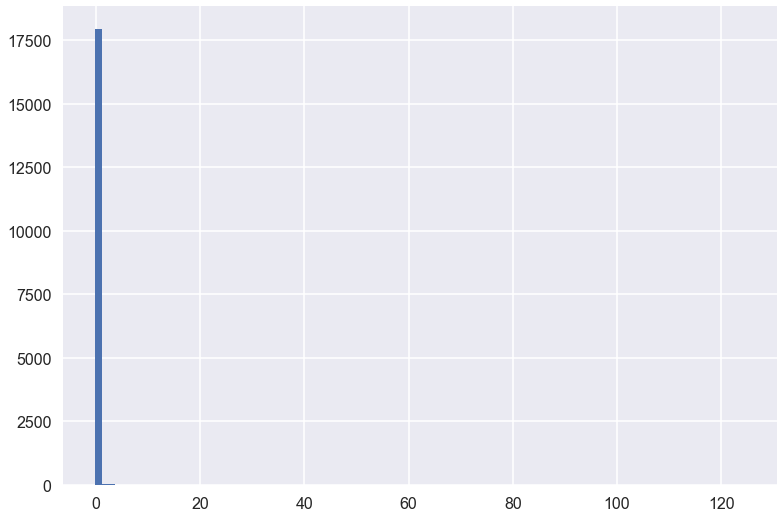

In [34]:
plt.hist(df_train['Submitted Charge per Beneficiary'], bins = 100);

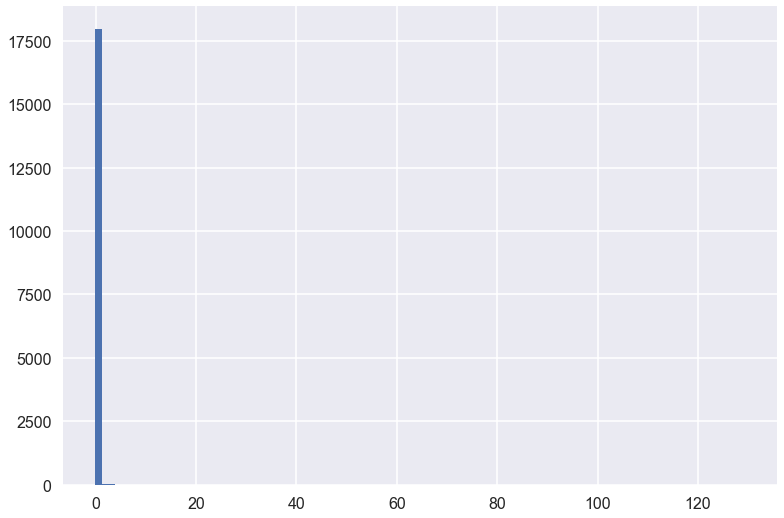

In [35]:
plt.hist(df_train['Allowed Amount per Beneficiary'], bins = 100);

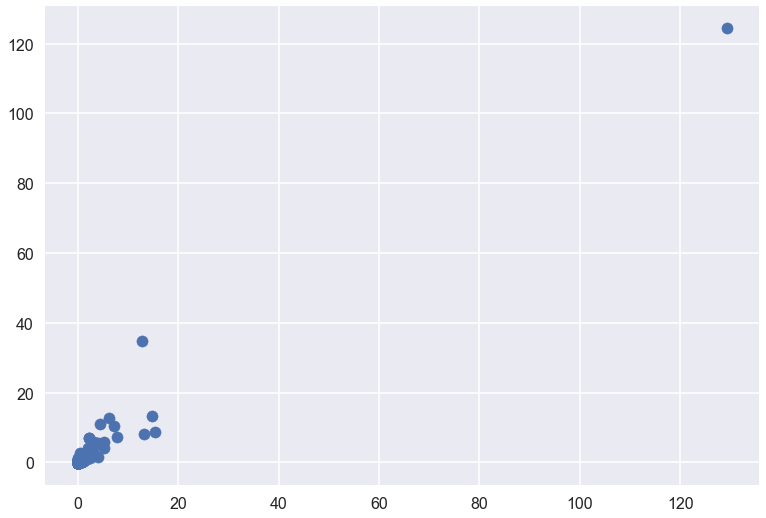

In [36]:
plt.scatter(df_train['Allowed Amount per Beneficiary'], df_train['Submitted Charge per Beneficiary'])

In [138]:
df_train = df_train.drop(df_train.columns[0], axis = 1)

In [141]:
df_train;

### new plain

In [117]:
df2.head()

,Doctor Identifier,Provider Type,Number of Services,Number of Beneficiaries,Total Submitted Charge Amount,Total Allowed Amount,Total Payment Amount,Total Standardized Payment Amount,Number of Drug Services,Total Drug Submitted Charge Amount,...,Percent Depression,Percent Diabetes,Percent Hyperlipidemia,Percent Hypertension,Percent Ischemic Heart Disease,Percent Osteoporosis,Percent Rheumatoid Arthritis or Osteoarthritis,Percent Schizophrenia or Other Psychotic Disorders,Percent Stroke,Average HCC Risk Score of Beneficiaries
0,450181093,Optometry,491,66,52550.00,45827.70,34211.71,32460.86,0,0.00,...,75.0,18.00,41.0,50.0,3.11,0.83,23.0,18.00,0.65,1.28
1,375128823,Emergency Medicine,3883,211,165408.00,84216.16,62257.97,62267.51,3304,28918.00,...,42.0,24.00,48.0,56.0,22.00,9.00,38.0,7.00,10.00,1.52
2,429379427,CRNA,3103,632,531584.25,230479.28,174262.00,167305.78,1016,32044.25,...,24.0,19.00,44.0,57.0,25.00,12.00,67.0,4.00,7.00,1.11
3,993555030,Podiatry,43,42,2935.00,2932.84,1652.31,4208.75,0,0.00,...,31.0,0.89,62.0,57.0,36.00,0.27,38.0,0.44,0.25,1.00
4,786413532,Licensed Clinical Social Worker,151,34,13118.00,3991.45,3911.61,3402.45,0,0.00,...,56.0,75.00,75.0,75.0,41.00,0.05,56.0,0.00,0.03,1.57


In [124]:
df2.columns

Index(['Doctor Identifier', 'Provider Type', 'Number of Services',
       'Number of Beneficiaries', 'Total Submitted Charge Amount',
       'Total Allowed Amount', 'Total Payment Amount',
       'Total Standardized Payment Amount', 'Number of Drug Services',
       'Total Drug Submitted Charge Amount', 'Total Drug Allowed Amount ',
       'Total Drug Payment Amount ', 'Total Drug Standardized Payment Amount',
       'Number of Medical Services', 'Percent Atrial Fibrillation',
       'Percent Alzheimer’s Disease or Dementia ', 'Percent Asthma ',
       'Percent Cancer ', 'Percent Heart Failure ',
       'Percent Chronic Kidney Disease',
       'Percent Chronic Obstructive Pulmonary Disease', 'Percent Depression ',
       'Percent Diabetes ', 'Percent Hyperlipidemia ', 'Percent Hypertension ',
       'Percent Ischemic Heart Disease ', 'Percent Osteoporosis ',
       'Percent Rheumatoid Arthritis or Osteoarthritis ',
       'Percent Schizophrenia or Other Psychotic Disorders ',
       'P

In [147]:
# plain data
df2 = pd.read_csv('X_train.csv')
df2 = df2.drop(['Doctor Identifier'], axis = 1)
df2.head()

,Provider Type,Number of Services,Number of Beneficiaries,Total Submitted Charge Amount,Total Allowed Amount,Total Payment Amount,Total Standardized Payment Amount,Number of Drug Services,Total Drug Submitted Charge Amount,Total Drug Allowed Amount,...,Percent Depression,Percent Diabetes,Percent Hyperlipidemia,Percent Hypertension,Percent Ischemic Heart Disease,Percent Osteoporosis,Percent Rheumatoid Arthritis or Osteoarthritis,Percent Schizophrenia or Other Psychotic Disorders,Percent Stroke,Average HCC Risk Score of Beneficiaries
0,Optometry,491,66,52550.00,45827.70,34211.71,32460.86,0,0.00,0.00,...,75.0,18.00,41.0,50.0,3.11,0.83,23.0,18.00,0.65,1.28
1,Emergency Medicine,3883,211,165408.00,84216.16,62257.97,62267.51,3304,28918.00,18847.34,...,42.0,24.00,48.0,56.0,22.00,9.00,38.0,7.00,10.00,1.52
2,CRNA,3103,632,531584.25,230479.28,174262.00,167305.78,1016,32044.25,22049.04,...,24.0,19.00,44.0,57.0,25.00,12.00,67.0,4.00,7.00,1.11
3,Podiatry,43,42,2935.00,2932.84,1652.31,4208.75,0,0.00,0.00,...,31.0,0.89,62.0,57.0,36.00,0.27,38.0,0.44,0.25,1.00
4,Licensed Clinical Social Worker,151,34,13118.00,3991.45,3911.61,3402.45,0,0.00,0.00,...,56.0,75.00,75.0,75.0,41.00,0.05,56.0,0.00,0.03,1.57


In [151]:
df_ohe2 = pd.get_dummies(df2, 'Provider Type')
df_ohe2.head()

,Number of Services,Number of Beneficiaries,Total Submitted Charge Amount,Total Allowed Amount,Total Payment Amount,Total Standardized Payment Amount,Number of Drug Services,Total Drug Submitted Charge Amount,Total Drug Allowed Amount,Total Drug Payment Amount,...,Provider Type_Registered Dietician/Nutrition Professional,Provider Type_Rheumatology,Provider Type_Sleep Medicine,Provider Type_Speech Language Pathologist,Provider Type_Sports Medicine,Provider Type_Surgical Oncology,Provider Type_Thoracic Surgery,Provider Type_Unknown Physician Specialty Code,Provider Type_Urology,Provider Type_Vascular Surgery
0,491,66,52550.00,45827.70,34211.71,32460.86,0,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
1,3883,211,165408.00,84216.16,62257.97,62267.51,3304,28918.00,18847.34,14776.33,...,0,0,0,0,0,0,0,0,0,0
2,3103,632,531584.25,230479.28,174262.00,167305.78,1016,32044.25,22049.04,17062.35,...,0,0,0,0,0,0,0,0,0,0
3,43,42,2935.00,2932.84,1652.31,4208.75,0,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
4,151,34,13118.00,3991.45,3911.61,3402.45,0,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0


In [281]:
# df2_nocat = df2.drop(['Provider Type'], axis =1)
df2_stand = (df2_nocat - df2_nocat.mean()) / (df2_nocat.std())
# df2_stand = df_norm.fillna(-1)

In [333]:
df2_stand.columns

Index(['Number of Services', 'Number of Beneficiaries',
       'Total Submitted Charge Amount', 'Total Allowed Amount',
       'Total Payment Amount', 'Total Standardized Payment Amount',
       'Number of Drug Services', 'Total Drug Submitted Charge Amount',
       'Total Drug Allowed Amount ', 'Total Drug Payment Amount ',
       'Total Drug Standardized Payment Amount', 'Number of Medical Services',
       'Percent Atrial Fibrillation',
       'Percent Alzheimer’s Disease or Dementia ', 'Percent Asthma ',
       'Percent Cancer ', 'Percent Heart Failure ',
       'Percent Chronic Kidney Disease',
       'Percent Chronic Obstructive Pulmonary Disease', 'Percent Depression ',
       'Percent Diabetes ', 'Percent Hyperlipidemia ', 'Percent Hypertension ',
       'Percent Ischemic Heart Disease ', 'Percent Osteoporosis ',
       'Percent Rheumatoid Arthritis or Osteoarthritis ',
       'Percent Schizophrenia or Other Psychotic Disorders ',
       'Percent Stroke ', 'Average HCC Risk Sco

In [334]:
df_train.columns

Index(['Number of Services', 'Number of Beneficiaries',
       'Total Submitted Charge Amount', 'Total Allowed Amount',
       'Total Payment Amount', 'Total Standardized Payment Amount',
       'Number of Drug Services', 'Total Drug Submitted Charge Amount',
       'Total Drug Allowed Amount ', 'Total Drug Payment Amount ',
       ...
       'Provider Type_Registered Dietician/Nutrition Professional',
       'Provider Type_Rheumatology', 'Provider Type_Sleep Medicine',
       'Provider Type_Speech Language Pathologist',
       'Provider Type_Sports Medicine', 'Provider Type_Surgical Oncology',
       'Provider Type_Thoracic Surgery',
       'Provider Type_Unknown Physician Specialty Code',
       'Provider Type_Urology', 'Provider Type_Vascular Surgery'],
      dtype='object', length=131)

### use pca

In [366]:
df_stand.head()

,Doctor Identifier,Number of Services,Number of Beneficiaries,Total Submitted Charge Amount,Total Allowed Amount,Total Payment Amount,Total Standardized Payment Amount,Number of Drug Services,Total Drug Submitted Charge Amount,Total Drug Allowed Amount,...,Payment Amount per Beneficiary,Drug Submitted Charge Amount per Beneficiary,Drug Allowed Amount per Beneficiary,Drug Payment Amount per Beneficiary,Submitted Charge per Drug,Allowed Amount per Drug,Payment Amount per Drug,Drug Submitted Charge Amount per Drug,Drug Allowed Amount per Drug,Drug Payment Amount per Drug
0,450181093,-0.054057,-0.149753,-0.119311,-0.114202,-0.104586,-0.107074,-0.082888,-0.049354,-0.059195,...,0.058344,-0.031194,-0.010812,-0.011095,0.079007,0.042538,0.041398,0.079007,-0.054402,-0.062364
1,375128823,0.078104,-0.072824,-0.065656,-0.027318,-0.031874,-0.029776,0.895459,0.056518,0.095355,...,-0.007309,-0.032359,0.010471,0.010190,0.104444,0.152638,0.134311,0.104444,-0.029996,-0.038016
2,429379427,0.047713,0.150532,0.108430,0.303718,0.258506,0.242621,0.218165,0.067963,0.121609,...,-0.012993,-0.026938,-0.002499,-0.002889,0.104673,0.153121,0.134725,0.104673,0.038446,0.029066
3,993555030,-0.071512,-0.162486,-0.142898,-0.211285,-0.188999,-0.180340,-0.082888,-0.049354,-0.059195,...,-0.082495,-0.100042,-0.010812,-0.011095,0.103001,0.145534,0.129775,0.103001,-0.054402,-0.062364
4,786413532,-0.067304,-0.166730,-0.138057,-0.208889,-0.183141,-0.182431,-0.082888,-0.049354,-0.059195,...,-0.060236,-0.070094,-0.010812,-0.011095,0.098076,0.142992,0.123642,0.098076,-0.054402,-0.062364


In [370]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(df_stand)
X_train_pca = pca.transform(df_stand)
# X_test_pca = pca.transform(X_test_HD)

pca.explained_variance_

array([  6.67126197e+16,   8.75355648e+00,   6.16664339e+00,
         3.89771440e+00,   1.81927919e+00])

### Try 1 class svm

In [371]:
from sklearn import svm

In [372]:
len(inds_NaN)

18000

In [373]:
clf = svm.OneClassSVM(nu=0.001, kernel="rbf", gamma = 0.0001)

np.random.seed(9001)
msk = np.random.rand(len(X_train_pca)) < 0.9

# df_train[~inds_NaN]

clf.fit(X_train_pca[msk])

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.0001, kernel='rbf',
      max_iter=-1, nu=0.001, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [374]:
risk = clf.decision_function(X_train_pca)

In [375]:
len(np.unique(risk))

545

In [376]:
np.unique(risk)

array([ -1.00205580e-03,  -1.00205580e-03,  -1.00205580e-03,
        -1.00205580e-03,  -1.00205580e-03,  -1.00205580e-03,
        -1.00205580e-03,  -1.00205580e-03,  -1.00205580e-03,
        -1.00205579e-03,  -1.00205466e-03,  -1.00205462e-03,
        -1.00205409e-03,  -1.00205275e-03,  -1.00204276e-03,
        -1.00203645e-03,  -1.00203368e-03,  -1.00202713e-03,
        -1.00197205e-03,  -1.00154908e-03,  -1.00092465e-03,
        -9.99867996e-04,  -9.99520639e-04,  -9.97974532e-04,
        -9.96902361e-04,  -9.96417204e-04,  -9.31315963e-04,
        -9.26870451e-04,  -9.19431838e-04,  -9.08570465e-04,
        -8.32428307e-04,  -8.18223469e-04,  -7.92270767e-04,
        -7.53987966e-04,  -6.57298774e-04,  -6.24041248e-04,
        -6.13577749e-04,  -6.06589796e-04,  -1.65648524e-04,
        -9.06237799e-05,  -4.89711372e-05,  -2.54933044e-05,
        -2.54933044e-05,  -2.54933044e-05,  -2.54933044e-05,
        -2.54933044e-05,  -2.54933044e-05,  -2.54933044e-05,
        -2.54933044e-05,

In [377]:
risk_submit = risk*2
np.unique(risk_submit)

array([ -2.00411161e-03,  -2.00411161e-03,  -2.00411161e-03,
        -2.00411161e-03,  -2.00411161e-03,  -2.00411161e-03,
        -2.00411161e-03,  -2.00411161e-03,  -2.00411159e-03,
        -2.00411158e-03,  -2.00410932e-03,  -2.00410923e-03,
        -2.00410818e-03,  -2.00410550e-03,  -2.00408553e-03,
        -2.00407290e-03,  -2.00406736e-03,  -2.00405427e-03,
        -2.00394411e-03,  -2.00309817e-03,  -2.00184931e-03,
        -1.99973599e-03,  -1.99904128e-03,  -1.99594906e-03,
        -1.99380472e-03,  -1.99283441e-03,  -1.86263193e-03,
        -1.85374090e-03,  -1.83886368e-03,  -1.81714093e-03,
        -1.66485661e-03,  -1.63644694e-03,  -1.58454153e-03,
        -1.50797593e-03,  -1.31459755e-03,  -1.24808250e-03,
        -1.22715550e-03,  -1.21317959e-03,  -3.31297048e-04,
        -1.81247560e-04,  -9.79422745e-05,  -5.09866089e-05,
        -5.09866089e-05,  -5.09866089e-05,  -5.09866089e-05,
        -5.09866089e-05,  -5.09866089e-05,  -5.09866089e-05,
        -5.09866089e-05,

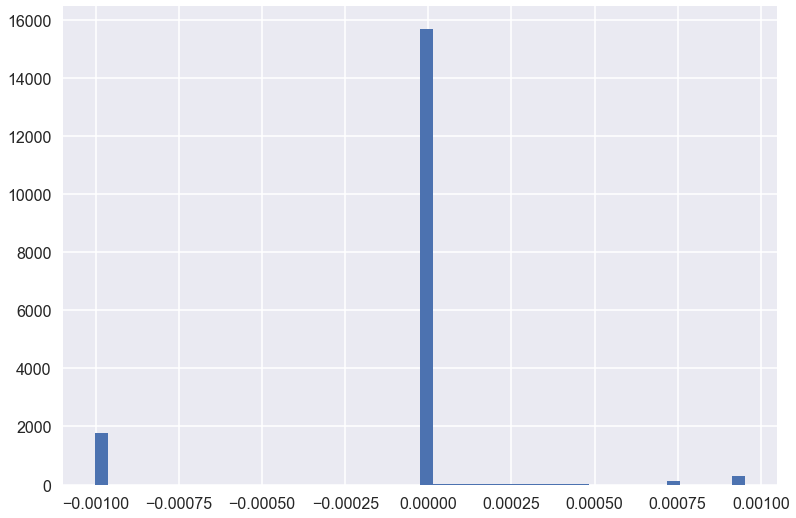

In [378]:
plt.hist(risk, bins = 50);

In [379]:
submission = pd.DataFrame(df['Doctor Identifier'])
submission['Risk'] = risk
submission.reset_index()
submission = submission.sort_values(['Risk'], ascending = False)

submission.to_csv('/Users/kate_zym/Documents/GitHub/datachallenge/svm11.csv', index = False, header = True)

### our test python

In [99]:
from sklearn.metrics import roc_curve, auc